In [ ]:
#hackxplore - Sentiment Analysis


# Loading Dataset, libraries, etc


In [ ]:
# Import libraries
import tweepy
from textblob import TextBlob # used for sentiment analysis
from wordcloud import WordCloud # optional - creates a word cloud of words with the most occurrences
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import requests
from typing import Union, List


In [ ]:
derogatory_terms = ['Cheena', 'chinaman', 'ching chong', 'ching', 'chong',
                    'chang', 'chink', 'chonky', 'coolie', 'chicom', 'panface',
                    'lingling', 'ling', 'made in china', 'chinetoque', 'chino',
                    'chochino', 'Kung flu', 'Chinese virus', 'China virus']
derogatory_hashtags = ['CCPVirus', 'ChinaDidThis', 'ChinaLiedPeopleDied', 'CPP',
                       'ChinaVirus', 'Chinesevirus', 'ChineseBioterrorism',
                       'ChineseVirus', 'chink', 'chinky', 'chonky',
                       'churka', 'cina', 'cokin', 'communistvirus',
                       'coolie', 'dink', 'FuckChina', 'KungFlu',
                       'MakeChinaPay', 'niakoue', 'pasteldeflango',
                       'slant', 'slanteye', 'slopehead', 'tingtong',
                       'wuhanvirus', 'wuhanflu', 'wuhanvirus', 'yokel']

In [ ]:
# Load the data
from google.colab import files 
uploaded = files.upload() 


Saving covid19_raw_data.csv to covid19_raw_data.csv


In [ ]:
tweets_asian = pd.read_csv('covid19_raw_data.csv', error_bad_lines=False, engine = 'python')

Skipping line 25478: unexpected end of data


In [ ]:
def is_discriminatory(txt: str) -> bool:
    is_anti_asian = False
    for word in derogatory_terms:
        if word in txt:
            is_anti_asian = True
    return is_anti_asian


tweets_asian['is_discriminating'] = tweets_asian['text'].apply(is_discriminatory)
tweets_asian = tweets_asian[tweets_asian['is_discriminating']]

tweets_asian.dropna(subset=['hashtags'], inplace=True)

def count_hashtag(hashtag: str) -> int:
    l_hashtag = hashtag.split(',')
    if l_hashtag is None:
        return 0
    num_hate_hashtag = 0
    for hashtag in l_hashtag:
        num_hate_hashtag += 1
    return num_hate_hashtag


tweets_asian["num_hashtags"] = tweets_asian["hashtags"].apply(count_hashtag)

def num_hate_hashtag(hashtag: str) -> int:
    l_hashtag = hashtag.split(',')
    count_hate = 0
    for hashtag in l_hashtag:
        for word in derogatory_hashtags:
            if word in hashtag:
                count_hate += 1

    return count_hate


tweets_asian["count_hate_hashtags"] = tweets_asian["hashtags"].apply(num_hate_hashtag)
tweets_asian.reset_index(drop=True, inplace=True)

# Analysis of dataset


In [ ]:
#Clean the text 

#function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

tweets_asian['text'] = tweets_asian['text'].apply(cleanTxt)
#tweets_asian

In [ ]:
# Subjectivity function
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity function
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_asian['Subjectivity'] = tweets_asian['text'].apply(getSubjectivity)
tweets_asian['Polarity'] = tweets_asian['text'].apply(getPolarity)
tweets_asian


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,is_discriminating,num_hashtags,count_hate_hashtags,Subjectivity,Polarity
0,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2/3/2014 1:23,6156,5463,193090,False,7/25/2020 12:26,I'm feeling a little anxious because COVID19...,['COVID19'],Twitter for Android,False,True,1,0,0.750000,-0.218750
1,Los Pepes,Nairobi,NaN,4/23/2016 7:39,610,1446,3280,False,7/25/2020 12:25,Why has Ruto not eulogisied Mkapa!! \nAsking f...,"['RutoSwindlingGEMA', 'COVID19']",Twitter for Android,False,True,2,0,0.000000,0.000000
2,Shayna Baruch,"Goa, India.",Anomalous MelPhleg who is a proud foodie 🤪🙃,12/14/2009 3:26,69,27,9,False,7/25/2020 12:23,"You don't drown by falling into a river, but b...","['facts', 'SaturdayMotivation', 'truth']",Twitter for Android,False,True,3,0,0.000000,0.000000
3,Lisa Murray,NaN,"🏡 Sligo, Ireland 📍Edinburgh 🗣 Speech and Langu...",1/27/2020 21:31,93,150,587,False,7/25/2020 12:21,100% feeling good and 0% some symptoms🙃 Long M...,['COVID19'],Twitter for iPhone,False,True,1,0,0.355556,0.216667
4,John Lichtenberger,"Roxbury, NJ",#Christian | #lawyer (Ret.) Tweets on Christia...,4/5/2009 22:31,38301,38729,27463,False,7/25/2020 12:19,Pandemic could push more N. Carolina families ...,"['homeschooling', 'COVID19', 'coronavirus', 'NC']",Twitter Web App,False,True,4,0,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,EvcoStudio,NaN,"Unique and personalized products for weddings,...",6/28/2016 5:14,1397,3156,7370,False,7/27/2020 6:57,These are the coolest christmas face masks eve...,"['christmas', 'merrychristmas', 'merry', 'best...",Twitter Web App,False,True,4,0,0.000000,0.000000
682,Samurai Explorer TV,"London, England",I am doing a video project to share my London ...,10/29/2019 21:36,18,28,472,False,7/27/2020 6:55,4K Cycling. Cycle from Big Ben! Join me my cy...,"['Lovelondon', 'cycling', 'Bigben', '4K', 'COV...",Twitter Web App,False,True,5,0,0.100000,0.000000
683,Shweta Berry,Delhi & Noida,#IoT Technology~#MarCom~#Strategic #Alliances~...,6/17/2010 3:54,1063,693,9495,False,7/27/2020 6:50,World is grappling with uncertainty due to Cov...,['Covid19'],Twitter Web App,False,True,1,0,0.187500,-0.062500
684,Eric D,Lancashire and Europe,Passion: International Bid + Communications St...,6/9/2015 9:06,12286,9166,34419,False,7/27/2020 6:50,Incompetent handling of Covid19 has cost the U...,"['Covid19', 'Brexit']",Twitter Web App,False,True,2,0,0.455556,0.216667


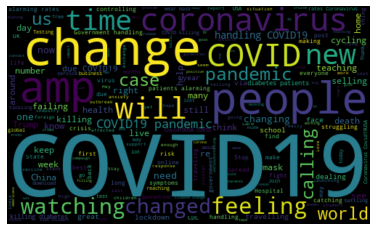

In [ ]:
# Plot Word Cloud
allWords =''.join([tweets for tweets in tweets_asian['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Compute negative, neutral, and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

tweets_asian['Analysis'] = tweets_asian['Polarity'].apply(getAnalysis)
tweets_asian

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,is_discriminating,num_hashtags,count_hate_hashtags,Subjectivity,Polarity,Analysis
0,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2/3/2014 1:23,6156,5463,193090,False,7/25/2020 12:26,I'm feeling a little anxious because COVID19...,['COVID19'],Twitter for Android,False,True,1,0,0.750000,-0.218750,Negative
1,Los Pepes,Nairobi,NaN,4/23/2016 7:39,610,1446,3280,False,7/25/2020 12:25,Why has Ruto not eulogisied Mkapa!! \nAsking f...,"['RutoSwindlingGEMA', 'COVID19']",Twitter for Android,False,True,2,0,0.000000,0.000000,Neutral
2,Shayna Baruch,"Goa, India.",Anomalous MelPhleg who is a proud foodie 🤪🙃,12/14/2009 3:26,69,27,9,False,7/25/2020 12:23,"You don't drown by falling into a river, but b...","['facts', 'SaturdayMotivation', 'truth']",Twitter for Android,False,True,3,0,0.000000,0.000000,Neutral
3,Lisa Murray,NaN,"🏡 Sligo, Ireland 📍Edinburgh 🗣 Speech and Langu...",1/27/2020 21:31,93,150,587,False,7/25/2020 12:21,100% feeling good and 0% some symptoms🙃 Long M...,['COVID19'],Twitter for iPhone,False,True,1,0,0.355556,0.216667,Positive
4,John Lichtenberger,"Roxbury, NJ",#Christian | #lawyer (Ret.) Tweets on Christia...,4/5/2009 22:31,38301,38729,27463,False,7/25/2020 12:19,Pandemic could push more N. Carolina families ...,"['homeschooling', 'COVID19', 'coronavirus', 'NC']",Twitter Web App,False,True,4,0,0.500000,0.500000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,EvcoStudio,NaN,"Unique and personalized products for weddings,...",6/28/2016 5:14,1397,3156,7370,False,7/27/2020 6:57,These are the coolest christmas face masks eve...,"['christmas', 'merrychristmas', 'merry', 'best...",Twitter Web App,False,True,4,0,0.000000,0.000000,Neutral
682,Samurai Explorer TV,"London, England",I am doing a video project to share my London ...,10/29/2019 21:36,18,28,472,False,7/27/2020 6:55,4K Cycling. Cycle from Big Ben! Join me my cy...,"['Lovelondon', 'cycling', 'Bigben', '4K', 'COV...",Twitter Web App,False,True,5,0,0.100000,0.000000,Neutral
683,Shweta Berry,Delhi & Noida,#IoT Technology~#MarCom~#Strategic #Alliances~...,6/17/2010 3:54,1063,693,9495,False,7/27/2020 6:50,World is grappling with uncertainty due to Cov...,['Covid19'],Twitter Web App,False,True,1,0,0.187500,-0.062500,Negative
684,Eric D,Lancashire and Europe,Passion: International Bid + Communications St...,6/9/2015 9:06,12286,9166,34419,False,7/27/2020 6:50,Incompetent handling of Covid19 has cost the U...,"['Covid19', 'Brexit']",Twitter Web App,False,True,2,0,0.455556,0.216667,Positive


In [ ]:
# Print all positive tweets
j=1
sorted_df = tweets_asian.sort_values(by=['Polarity'], ignore_index=True)
for i in range(0, sorted_df.shape[0]):
  if (sorted_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sorted_df['text'][i])
    print()
    j +=1

1) Day 136
Reported Cases of COVID19 now 15.759 million

Record High July 23 - 282.7K
9 Day rolling average of 241.75… 

2) The changes around Covid19 - social distancing/isolation, reduced pleasurable activities, job loss, financial inse… 

3) The changes around Covid19 - social distancing/isolation, reduced pleasurable activities, job loss, financial inse… 

4) The changes around Covid19 - social distancing/isolation, reduced pleasurable activities, job loss, financial inse… 

5) The changes around Covid19 - social distancing/isolation, reduced pleasurable activities, job loss, financial inse… 

6) I ask, what has Trump ACCOMPLISHED in the last 4 years (other than bungling the pandemic response, destroyed relat… 

7) Thanks to  and COVID19 I learnt a new language in less than 6 months. I'm not completely fluent yet but I… 

8) COVID19 is no joke!! Wear a mask social distance and always change your clothes and shower when coming home from w… 

9) COVID19 has worsened an already dire o

In [ ]:
# Print all negative tweets
j=1
sorted_df = tweets_asian.sort_values(by=['Polarity'], ascending=False, ignore_index=True)
for i in range(0, sorted_df.shape[0]):
  if (sorted_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sorted_df['text'][i])
    print()
    j +=1

1) Many people have seen the effects of broken food SupplyChains during COVID19, dealing with empty shelves in shop… 

2) “The new normal for all systems is characterised by climatechange  and rising inequality, lately magnified by the… 

3) 8/1/20: Oklahoma COVID19 data from : 

🚨 7-day rolling average of new daily cases tops 1,100… 

4) Following recent changes to the adult audiology service due to COVID19, we will no longer offer a walk-in service… 

5) This is an update on the 7-day rolling average of new covid19 cases reported by UnitedStates states. It seems mos… 

6) Victoria reported 282 new COVID19 cases today and the seven day moving average is still falling
NSW reported 7
Qld… 

7) For &gt; a month, USA has thrown up rolling weekly averages of &gt; 350k new COVID19 cases, about 2x that of the dark t… 

8) 🔹Adding a rolling 7-day average of new reported cases
🔹COVID19-confirmed percentage positivity rate will now inclu… 

9)   it was overwhelming public pressure that forced t

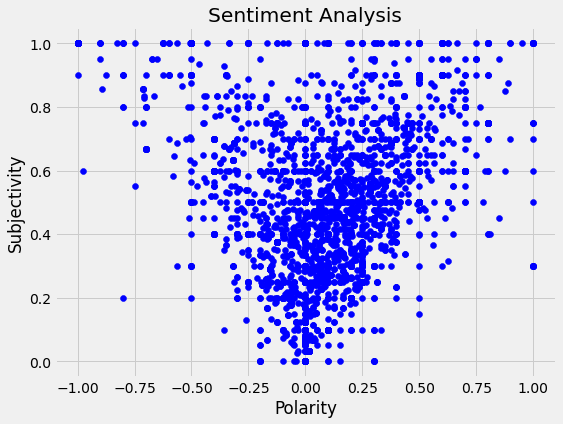

In [ ]:
# plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, tweets_asian.shape[0]):
  plt.scatter(tweets_asian['Polarity'][i], tweets_asian['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Percentage of positive tweets
pos_tweets = tweets_asian[tweets_asian.Analysis == 'Positive']
pos_tweets = pos_tweets['text']
round((pos_tweets.shape[0]/tweets_asian.shape[0]) * 100, 1)

36.6

In [ ]:
#Percentage of negative tweets
neg_tweets = tweets_asian[tweets_asian.Analysis == 'Negative']
neg_tweets = neg_tweets['text']
round((neg_tweets.shape[0]/tweets_asian.shape[0]) * 100, 1)

22.0

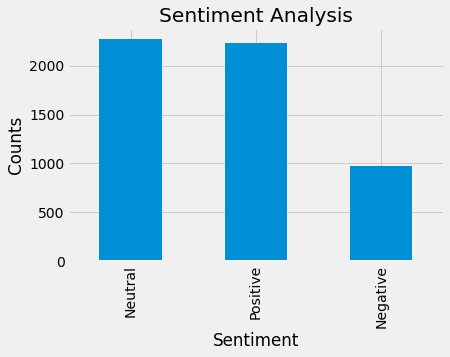

In [ ]:
#Show value counts
tweets_asian['Analysis'].value_counts()

#Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_asian['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# heat map of most negative tweets in the united states
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='hackXplore')


def lat(check: str) -> Union[list[None], Any]:
    cor = geolocator.geocode(check)
    if cor is None:
        return [None, None]

    return cor.latitude


def long(check: str) -> Union[list[None], Any]:
    cor = geolocator.geocode(check)
    if cor is None:
        return [None, None]

    return cor.longitude


tweets_asian.dropna(subset=['user_location'], inplace=True)
tweets_asian['lat'] = tweets_asian['user_location'].apply(lat)
tweets_asian['long'] = tweets_asian['user_location'].apply(long)

plt.figure(figsize=(12,8))
sns.scatterplot(x= 'long', y= 'lat', data= tweets_asian, palette='RdYlGn', edgecolor = None, alpha=0.2)

TypeError: ignored